# Introduction

# Setup

## Library Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import figure
#%matplotlib inline

from IPython.display import Image

import re

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_selection import mutual_info_regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

from sklearn.model_selection import cross_val_score, KFold




import scipy.stats
from scipy.stats import chi2




print("Setup Complete")



Setup Complete


## Mutual Information

In [2]:
# Utility Functions

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

## Load data

In [3]:
df_filepath ='/kaggle/input/30-days-of-ml/train.csv'
df = pd.read_csv(df_filepath)


pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 75

df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [4]:
# Categorical features
cat_features = [ 'cat0',
                 'cat1',
                 'cat2',
                 'cat3',
                 'cat4',
                 'cat5',
                 'cat6',
                 'cat7',
                 'cat8',
                 'cat9']

In [5]:
# Cont features
cont_features = ['cont0',
                 'cont1',
                 'cont2',
                 'cont3',
                 'cont4',
                 'cont5',
                 'cont6',
                 'cont7',
                 'cont8',
                 'cont9',
                 'cont10',
                 'cont11',
                 'cont12',
                 'cont13',
                 'target']

# Exploratory Data Analysis

In [6]:
#List column names
list(df.columns)

['id',
 'cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cont0',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'target']

In [7]:
#Check columns data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

Variables Categoricas. Operaciones.

## Check for duplicates

In [8]:
#Check duplicate rows
df[df.duplicated(keep=False)]


,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target


No duplicate rows

In [9]:
#Check duplicate IDs
df.duplicated(subset=['id']).unique()


array([False])

No duplicate IDs

In [10]:
df = df.drop(['id'], axis=1)

We have unknown values in
- Education_Level
- Marital_Status
- Income_Category

We can later map them or filter them before building the models

## Check zeros

## Target variable distribution

Text(0, 0.5, 'Frequency')

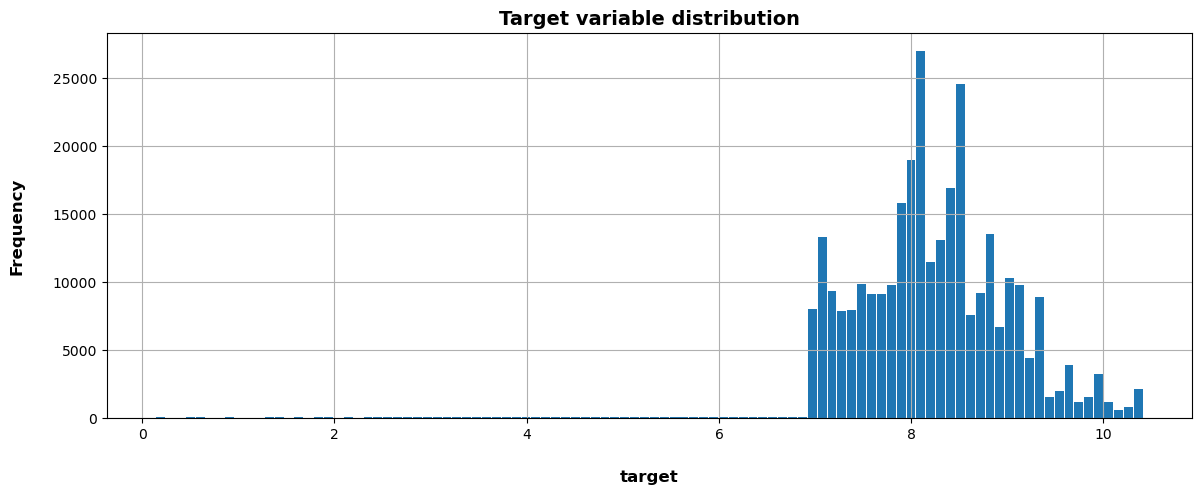

In [11]:
plt = df.target.plot.hist( grid=True,
                           bins=100,
                           rwidth=0.9,
                           figsize=(14,5))

plt.set_title("Target variable distribution", weight='bold', size=14)
plt.set_xlabel("target", labelpad=20, weight='bold', size=12)
plt.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

Text(0, 0.5, 'Frequency')

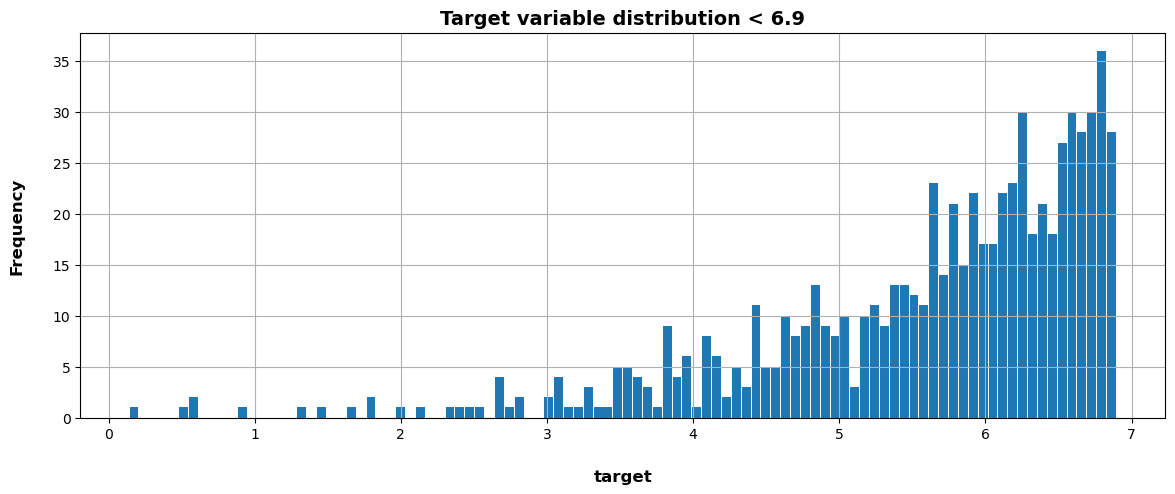

In [12]:
df_target_lower_than_7 = df.loc[df['target'] < 6.9]

plt1 = df_target_lower_than_7.target.plot.hist( grid=True,
                           bins=100,
                           rwidth=0.9,
                           figsize=(14,5))

plt1.set_title("Target variable distribution < 6.9", weight='bold', size=14)
plt1.set_xlabel("target", labelpad=20, weight='bold', size=12)
plt1.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

Text(0, 0.5, 'Frequency')

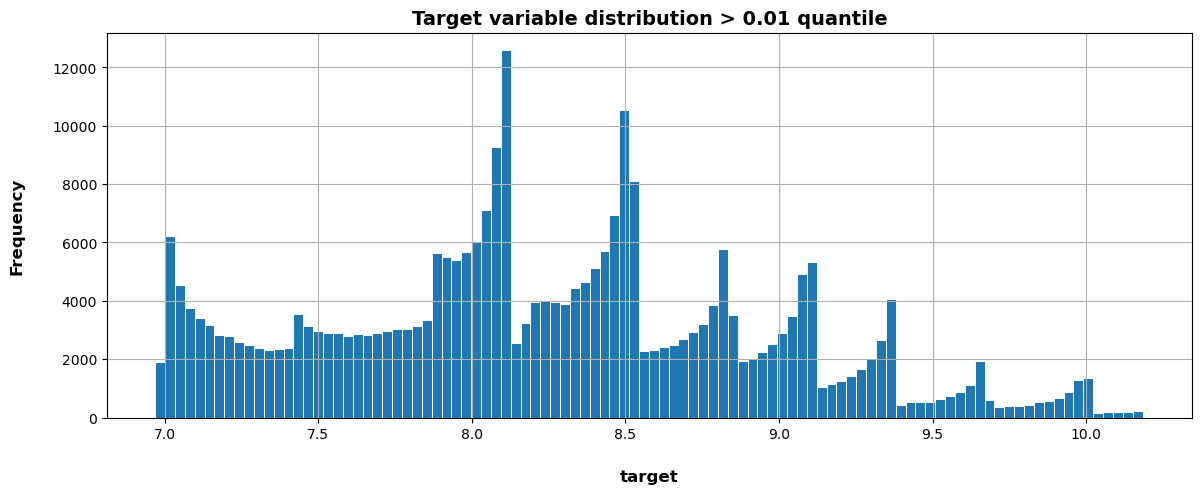

In [13]:
df_target_larger_than_7 = df.loc[(df['target'] > df.target.quantile(0.01)) & (df['target'] < df.target.quantile(0.99))]

plt1 = df_target_larger_than_7.target.plot.hist( grid=True,
                           bins=100,
                           rwidth=0.9,
                           figsize=(14,5))

plt1.set_title("Target variable distribution > 0.01 quantile", weight='bold', size=14)
plt1.set_xlabel("target", labelpad=20, weight='bold', size=12)
plt1.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

## Cleaning border values in the train dataset

In [14]:
df = df.loc[(df['target'] > df.target.quantile(0.01)) & (df['target'] < df.target.quantile(0.99))]

## Mutual Information

In [15]:
X = df.copy()
y = X.pop("target")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int
X

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,0,0,0,0,0,0,0,0,0,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,0,0,1,1,0,1,0,1,1,1,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
2,1,1,1,0,0,1,0,2,1,2,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
3,0,0,1,0,0,1,0,0,0,3,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
4,1,1,1,0,0,1,0,0,1,0,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,1,1,0,1,0,0,1,5,0.697124,0.483452,0.297770,0.195821,0.307883,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404
299996,1,0,1,0,0,0,0,0,3,2,0.446200,0.715135,0.610931,0.601730,0.736713,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611
299997,0,0,1,0,0,2,0,0,2,2,0.544279,0.060937,0.590955,0.905308,0.277074,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732
299998,1,0,1,0,0,0,0,0,3,5,0.300062,0.613118,0.285213,0.406851,0.805963,0.344404,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030


In [16]:
mi_scores = make_mi_scores(X, y, discrete_features)

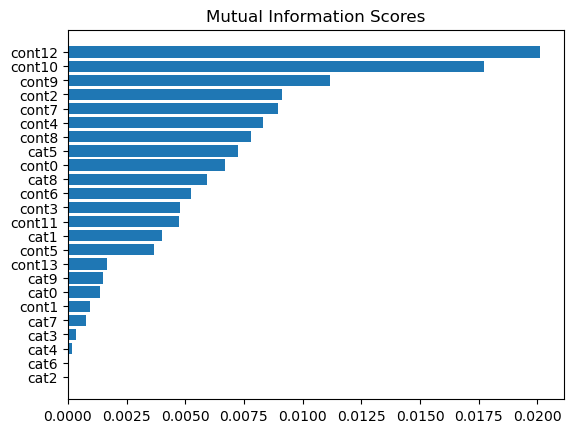

In [17]:
import matplotlib.pyplot as plt

plot_mi_scores(mi_scores)

## Categorical variables

### cat0

[Text(0.5, 1.0, 'cat0 values distribution')]

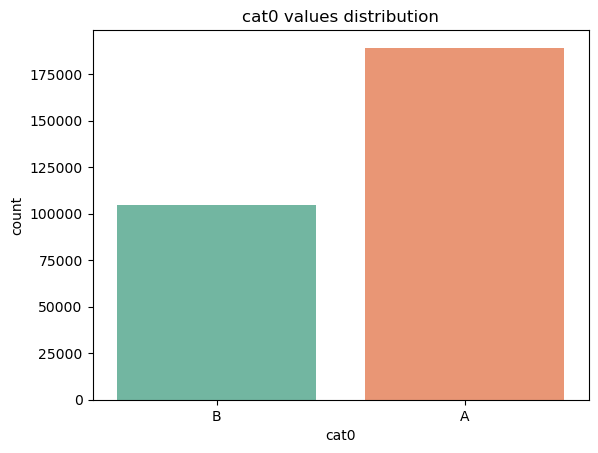

In [18]:
sns.countplot(x = 'cat0', palette = 'Set2', data = df).set(title='cat0 values distribution')

[Text(0.5, 1.0, 'target by cat0 boxplot')]

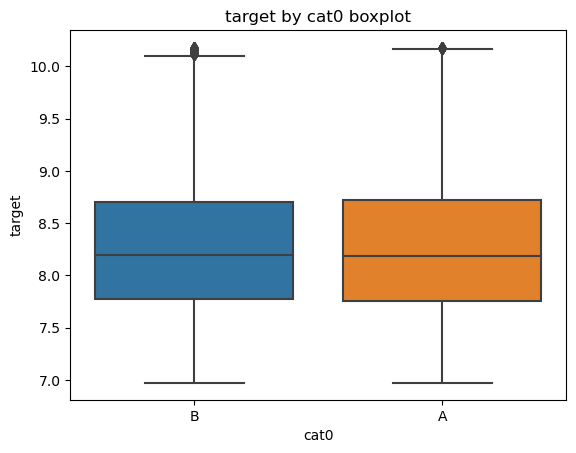

In [19]:
sns.boxplot(x='cat0', y='target', data=df).set(title='target by cat0 boxplot')

### cat1

[Text(0.5, 1.0, 'cat1 values distribution')]

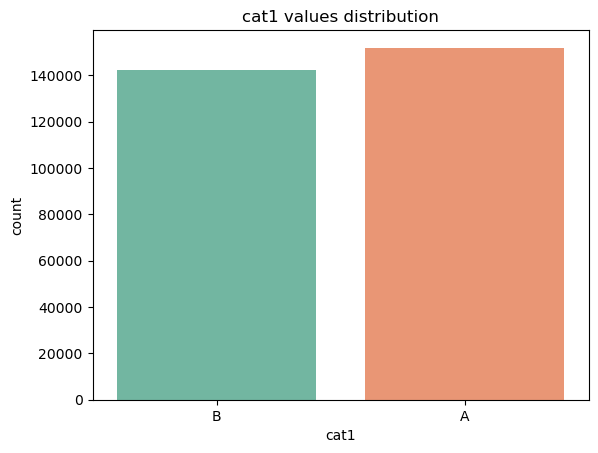

In [20]:
sns.countplot(x = 'cat1', palette = 'Set2', data = df).set(title='cat1 values distribution')

[Text(0.5, 1.0, 'target by cat1 boxplot')]

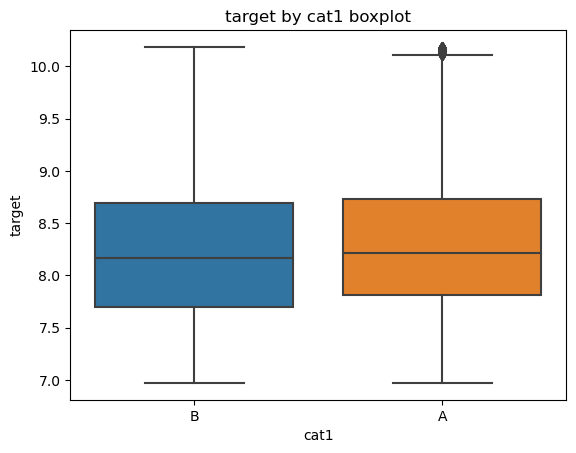

In [21]:
sns.boxplot(x='cat1', y='target', data=df).set(title='target by cat1 boxplot')

### cat2

[Text(0.5, 1.0, 'cat2 values distribution')]

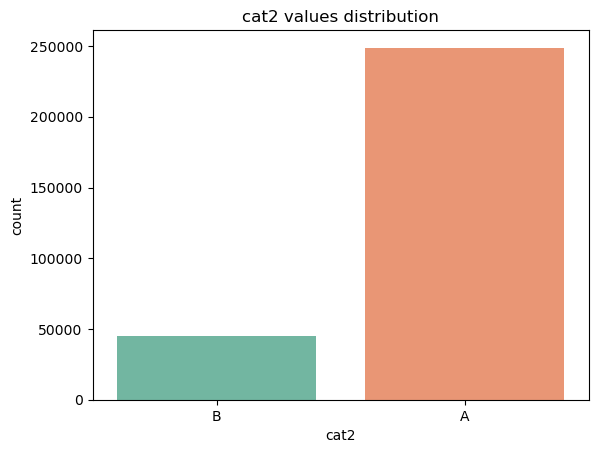

In [22]:
sns.countplot(x = 'cat2', palette = 'Set2', data = df).set(title='cat2 values distribution')

[Text(0.5, 1.0, 'target by cat2 boxplot')]

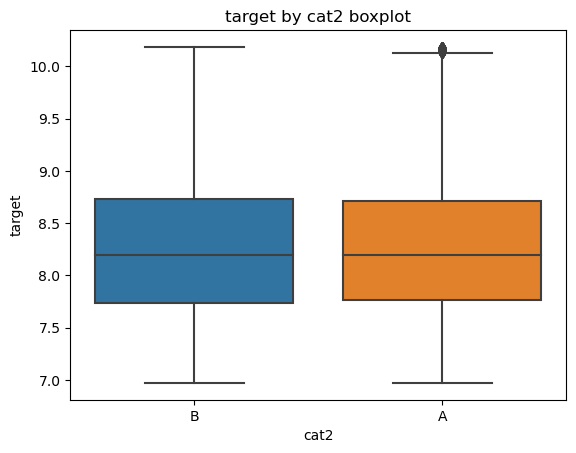

In [23]:
sns.boxplot(x='cat2', y='target', data=df).set(title='target by cat2 boxplot')

### cat3

[Text(0.5, 1.0, 'cat3 values distribution')]

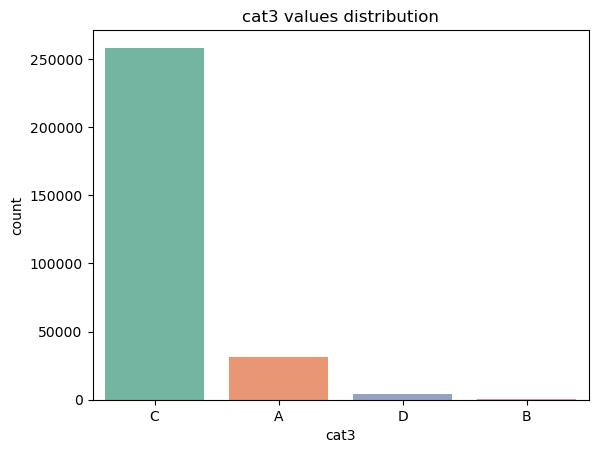

In [24]:
sns.countplot(x = 'cat3', palette = 'Set2', data = df).set(title='cat3 values distribution')

[Text(0.5, 1.0, 'target by cat3 boxplot')]

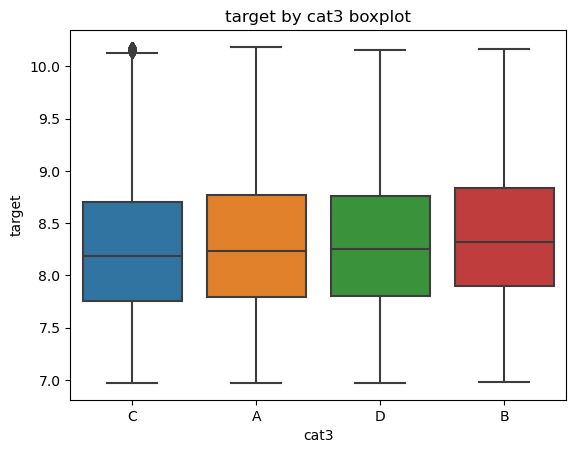

In [25]:
sns.boxplot(x='cat3', y='target', data=df).set(title='target by cat3 boxplot')

The categories are too unbalanced for this column to be used

### cat4

[Text(0.5, 1.0, 'cat4 values distribution')]

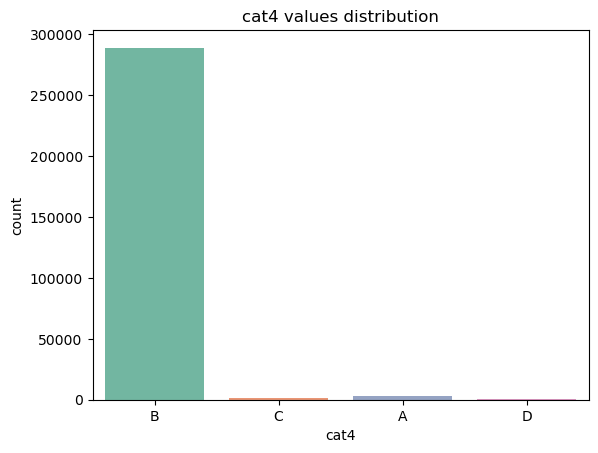

In [26]:
sns.countplot(x = 'cat4', palette = 'Set2', data = df).set(title='cat4 values distribution')

[Text(0.5, 1.0, 'target by cat4 boxplot')]

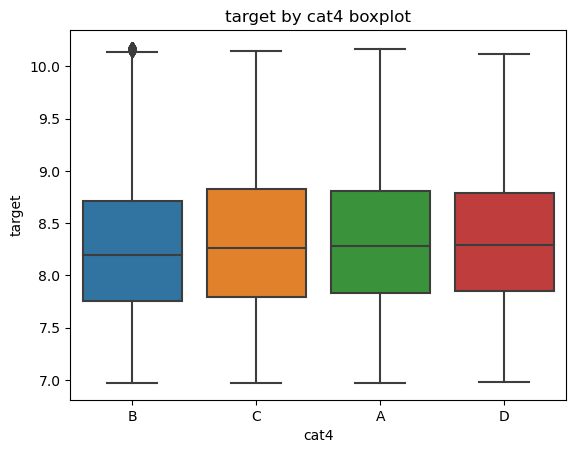

In [27]:
sns.boxplot(x='cat4', y='target', data=df).set(title='target by cat4 boxplot')

The categories are too unbalanced for this column to be used

### cat5

[Text(0.5, 1.0, 'cat5 values distribution')]

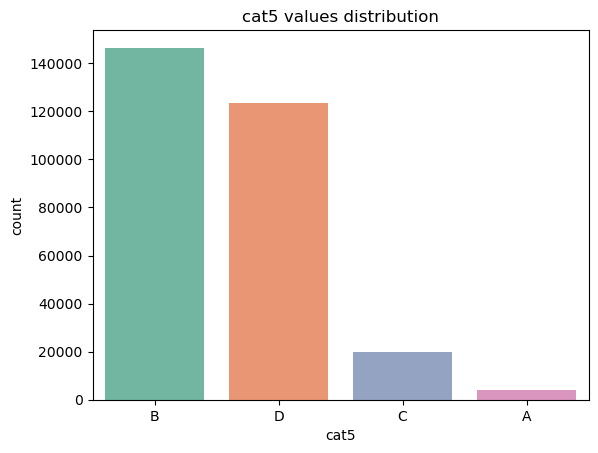

In [28]:
sns.countplot(x = 'cat5', palette = 'Set2', data = df).set(title='cat5 values distribution')

[Text(0.5, 1.0, 'target by cat5 boxplot')]

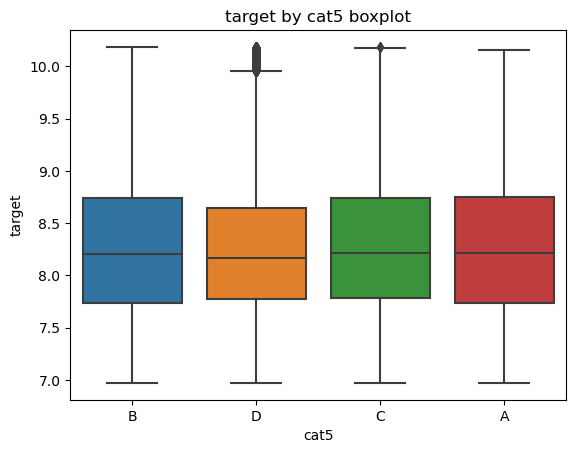

In [29]:
sns.boxplot(x='cat5', y='target', data=df).set(title='target by cat5 boxplot')

### cat6

[Text(0.5, 1.0, 'cat6 values distribution')]

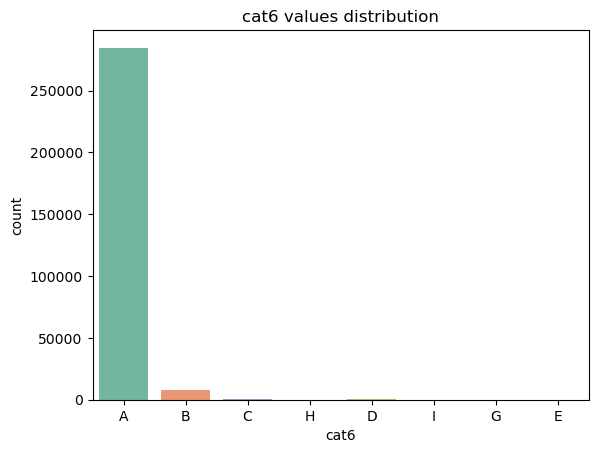

In [30]:
sns.countplot(x = 'cat6', palette = 'Set2', data = df).set(title='cat6 values distribution')

[Text(0.5, 1.0, 'target by cat6 boxplot')]

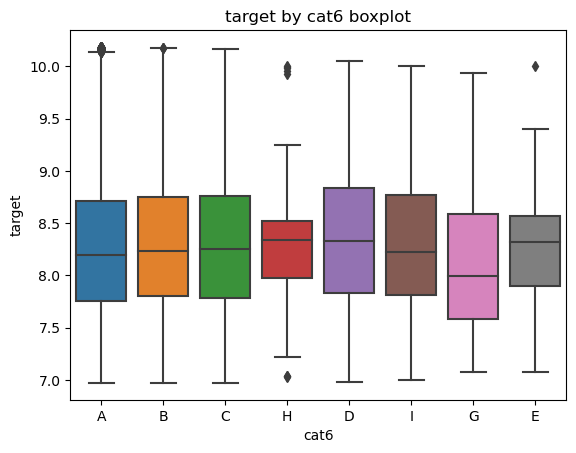

In [31]:
sns.boxplot(x='cat6', y='target', data=df).set(title='target by cat6 boxplot')

The categories are too unbalanced for this column to be used

### cat7

[Text(0.5, 1.0, 'cat7 values distribution')]

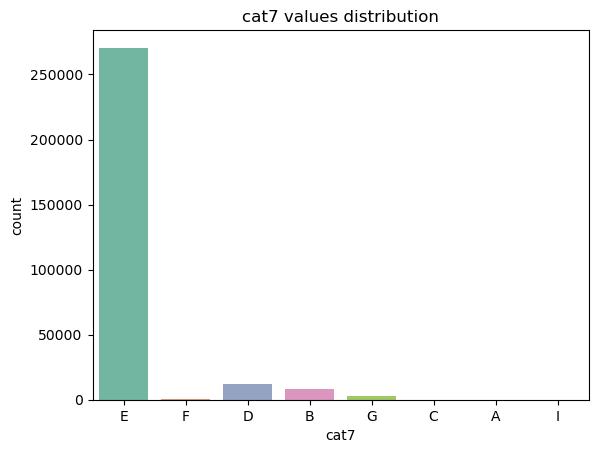

In [32]:
sns.countplot(x = 'cat7', palette = 'Set2', data = df).set(title='cat7 values distribution')

[Text(0.5, 1.0, 'target by cat7 boxplot')]

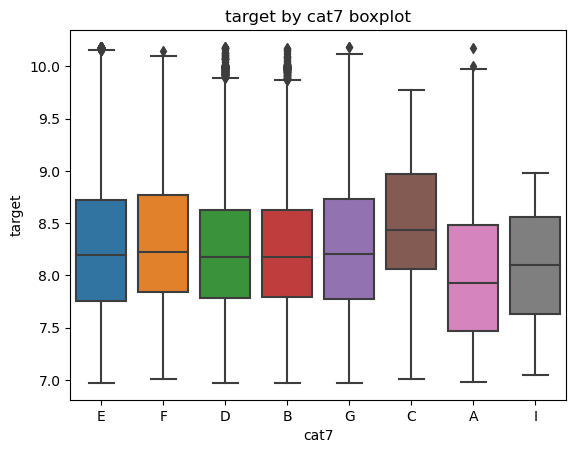

In [33]:
sns.boxplot(x='cat7', y='target', data=df).set(title='target by cat7 boxplot')

### cat8

[Text(0.5, 1.0, 'cat8 values distribution')]

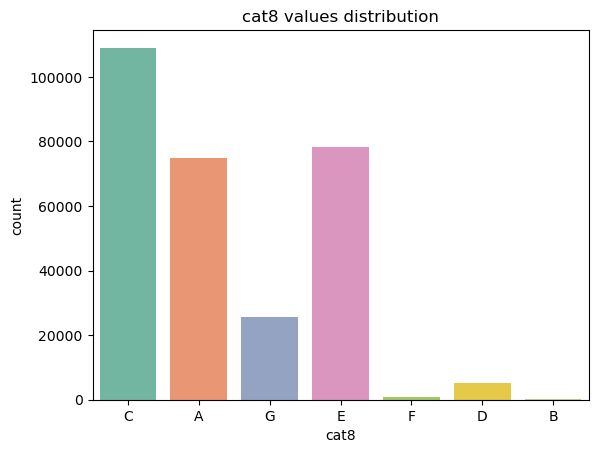

In [34]:
sns.countplot(x = 'cat8', palette = 'Set2', data = df).set(title='cat8 values distribution')

[Text(0.5, 1.0, 'target by cat8 boxplot')]

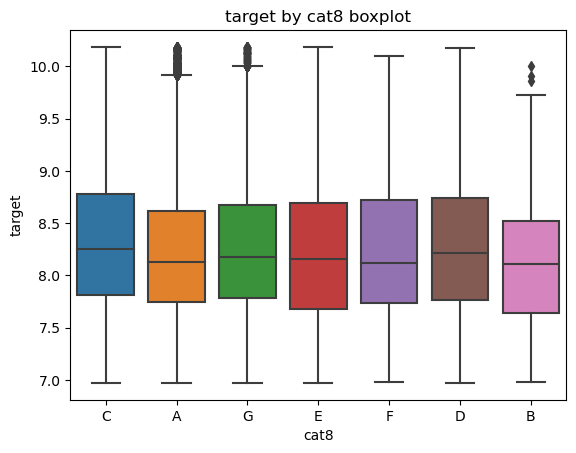

In [35]:
sns.boxplot(x='cat8', y='target', data=df).set(title='target by cat8 boxplot')

### cat9

[Text(0.5, 1.0, 'cat9 values distribution')]

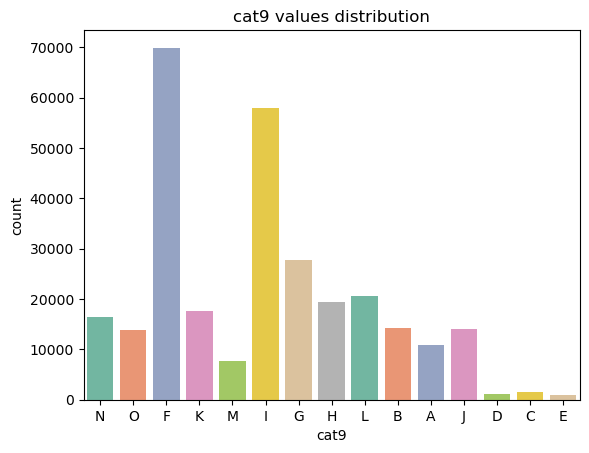

In [36]:
sns.countplot(x = 'cat9', palette = 'Set2', data = df).set(title='cat9 values distribution')

[Text(0.5, 1.0, 'target by cat9 boxplot')]

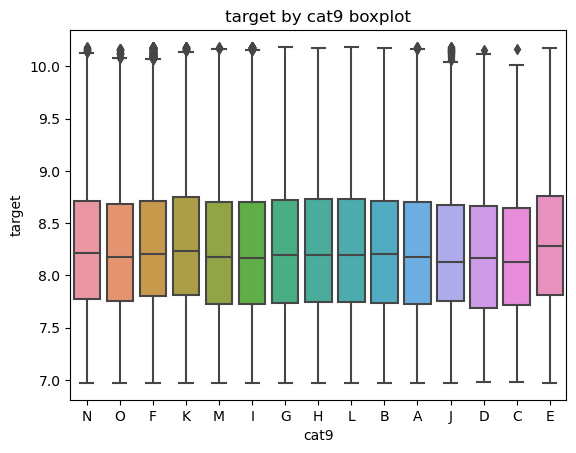

In [37]:
sns.boxplot(x='cat9', y='target', data=df).set(title='target by cat9 boxplot')

## Predictor variable candidates

- cat5
- cat8
- cat1
- cat9
- cat7

### Income

plt.figure(figsize = (20,35))
plt.subplot(5,2,10)
sns.countplot(x = 'Income_Category', hue = 'Attrition_Flag', palette = 'Set2', data = df)
plt.show()


cross_tab = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Income Category")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


### Check if the difference between the income groups is statistically significant


chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

We have a p-value < 0.05 so we can say that the difference between the groups is significant.
This column can be encoded to an ordinal numeric variable later.

### Marital_Status

plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Marital_Status', palette = 'Set2', data = df)
plt.show()

cross_tab = pd.crosstab(index=df['Marital_Status'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Marital_Status'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Marital_Status")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


### Check if the difference between the marital status groups is statistically significant

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

The difference is not significant

### Card_Category

plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Card_Category', palette = 'Set2', data = df)
plt.show()

cross_tab = pd.crosstab(index=df['Card_Category'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Card_Category'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Card_Category")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


### Check if the difference between the card_category groups is statistically significant

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

We can see that the differences in this group are not statistically significant because of the low number of observations in some of the categories

### Education level

plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Education_Level', palette = 'Set2', data = df)
plt.show()

cross_tab = pd.crosstab(index=df['Education_Level'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Education_Level'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Education_Level")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


### Check if the difference between the education_level groups is statistically significant

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

The difference is not significant

## Numeric variables

fig = plt.figure(figsize = (20,20))
ax = fig.gca()
plt.tight_layout()
df.loc[:, ~df.columns.isin(['CLIENTNUM', "Attrition_Flag_Int"])].hist(ax = ax)
fig.show()

df.loc[:, ~df.columns.isin(['CLIENTNUM'])].describe()

### Correlation Matrix

#fig, ax = plt.subplots()
correlation = df.loc[:, df.columns.isin(cont_features)].corr().round(1)
#plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'RdBu', vmin=-1, vmax=1)
#plt.show()


- We can see that Revolving_balance and avg_utilization_ratio are positively correlated.
- The avg_utilization_ratio is also negatively correlated to the credit_limit and the avg_open_to_buy
- Total_Trans_Amt and Total_Trans_Ct are also positively correlated.

### Attrition by Age Box plot

sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df)

We don't see a difference between the two groups

### Attrition by dependent count Box plot

sns.boxplot(x='Attrition_Flag', y='Dependent_count', data=df)

Dependent_count can be used in the model as a predictor

### Attrition by months on book

sns.boxplot(x='Attrition_Flag', y='Months_on_book', data=df)

We don't see a difference between the two groups

### Attrition by Total_Relationship_Count Box Plot

sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=df)

We see a difference and we can use this variable as a predictor

### Attrition by Months_Inactive_12_mon Boxplot

sns.boxplot(x='Attrition_Flag', y='Months_Inactive_12_mon', data=df)

We see a difference and we can use this variable as a predictor

### Attrition by Contacts_Count_12_mon Boxplot

sns.boxplot(x='Attrition_Flag', y='Contacts_Count_12_mon', data=df)

We see a difference and we can use this variable as a predictor

### Attrition by Credit_Limit Boxplot

sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df)

We see a small difference, it may be used as a predictor. Since it is correlated with the avg_utilization_ratio we should choose one of the two

### Attrition by Total_Revolving_Bal Boxplot

sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=df)

We see a difference and we can use this variable as a predictor

### Attrition by Avg_Open_To_Buy Boxplot

sns.boxplot(x='Attrition_Flag', y='Avg_Open_To_Buy', data=df)

We don't see a difference between the two groups

### Attrtion by Total_Amt_Chng_Q4_Q1 Boxplot

sns.boxplot(x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1', data=df)

We preffer not to add it to the model for explainability

### Attrtion by Total_Trans_Amt Boxplot

sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df)

We see a difference and we may use this variable as a predictor

### Attrition by Total_Trans_Ct Boxplot

sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df)

We observe a significant difference between the groups, since amount and quantity of transactions are correlated, we choose this variable as predictor and discard the amount

### Attrition by Total_Ct_Chng_Q4_Q1 Boxplot

sns.boxplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=df)

We preffer not to add it to the model for explainability

### Attrition by Avg_Utilization_Ratio Boxplot

sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=df)

We see a difference and we can use this variable as a predictor

## Select candidate variables

df.columns

## Numerics

- Dependent_count
- Total_Relationship_Count
- Months_Inactive_12_mon
- Contacts_Count_12_mon
- Total_Trans_Ct
- Avg_Utilization_Ratio

## Categoricals

- Gender
- Income_Category

# Models preparation and evaluation


## Dataset preparation

### Categoricals

#### Ordinal encoding

Income_Category_enc = df['Income_Category']
Income_Category_enc.unique()

#We map unknowns to 0, which is the most repeated value
df['Income_Category'] =  df['Income_Category'].map({'Unknown':1,
                                                'Less than $40K':1,
                                                '$40K - $60K':2,
                                                '$60K - $80K':3,
                                                '$80K - $120K':4, 
                                                '$120K +':5})

#### Onehot encoder

categoricals = ['Gender']

enc = OneHotEncoder(drop='first')
X = df[categoricals]
enc.fit(X)
enc.categories_

dummies = enc.transform(X).toarray()
dummies

dummies.shape

dummies_df = pd.DataFrame(dummies)
dummies_df

col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals)) ]

col_names

col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
col_names_drop_first

dummies_df.columns = col_names_drop_first
dummies_df

#### Numerics

numericals = ['Dependent_count',
            'Total_Relationship_Count',
            'Months_Inactive_12_mon',
            'Contacts_Count_12_mon',
            'Total_Trans_Ct',
            'Avg_Utilization_Ratio',
             'Income_Category']

X = df[numericals]

scaler = StandardScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
std_df

#### Concat results

df_prep = pd.concat([dummies_df,
                     std_df
                     ], axis = 1)
df_prep

X = df_prep
y = df.Attrition_Flag

## BASELINE: NAIVE BAYES

### Training

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

###Instance and train the model

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

y_pred

### Evaluation

confusion_matrix(y_test, y_pred)

confusion=confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Accuracy: Overall performance of the model
# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_score(y_test, y_pred)

# Precision: How accurate the positive predictions are
# Precision = TP / (TP + FP)
precision_score(y_test, y_pred)


# Recall sensitivity: Coverage of actual positive sample 
recall_score(y_test, y_pred)

# Specificity: Coverage of actual negative sample
# Specificity = TN / (TN + FP)
specificity = TN / (TN + FP)
print(specificity)

# F1 score: Hybrid metric useful for unbalanced classes. Combines precision and recall sensitivity
# F1 score = 2TP / (2TP + FP + FN)
f1_score(y_test, y_pred)

# Confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction');

Y_scores = gnb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, Y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Naive Bayes Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NAIVE BAYES')
plt.show()

## Logistic Regression

### Training

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 12)

logistic_regression = LogisticRegression(penalty='none') 
logistic_regression.fit(X_train, y_train);

y_pred = logistic_regression.predict(X_test)
y_pred

y_pred_proba = logistic_regression.predict_proba(X_test)
y_pred_proba

### Evaluation

confusion_matrix(y_test, y_pred)

confusion=confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Accuracy: Overall performance of the model
# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_score(y_test, y_pred)

# Precision: How accurate the positive predictions are
# Precision = TP / (TP + FP)
precision_score(y_test, y_pred)


# Recall sensitivity: Coverage of actual positive sample 
# Recall sensitivity = TP / (TP + FN)
recall_score(y_test, y_pred)

# Specificity: Coverage of actual negative sample
# Specificity = TN / (TN + FP)
specificity = TN / (TN + FP)
print(specificity)

# F1 score: Hybrid metric useful for unbalanced classes. Combines precision and recall sensitivity
# F1 score = 2TP / (2TP + FP + FN)
f1_score(y_test, y_pred)

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction');

Y_scores = logistic_regression.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Logistic RegressionClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LOGISTIC REGRESSION')
plt.show()

## KNN

### Training

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Function to check different knn neighbours

def scores_knn(X, y, start,stop,step):
    
    scores_list = []
    
    for i in range(start,stop,step):
        
        model = KNeighborsClassifier(n_neighbors=i)

        kf = KFold(n_splits=10, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        dict_row_score = {'mean_score':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        scores_list.append(dict_row_score)
    
    df_scores = pd.DataFrame(scores_list)
    
    df_scores['lower_bound'] = df_scores['mean_score'] - df_scores['score_std']
    df_scores['upper_bound'] = df_scores['mean_score'] + df_scores['score_std']
    
    return df_scores


# We try 1 to 20 neighbours
df_scores= scores_knn(X_train, y_train, 1, 21, 1)

# Visualize the results

plt.plot(df_scores['n_neighbours'], df_scores['lower_bound'], color='r')
plt.plot(df_scores['n_neighbours'], df_scores['mean_score'], color='b')
plt.plot(df_scores['n_neighbours'], df_scores['upper_bound'], color='r')
plt.ylim(0.7, 1);

# We check the hyperparameter with the higher score

df_scores.loc[df_scores.mean_score == df_scores.mean_score.max()]


# We assign the hyperparameter to a variable
best_k = df_scores.loc[df_scores.mean_score == df_scores.mean_score.max(),'n_neighbours'].values[0]
best_k

# We train the model with the best k
model = KNeighborsClassifier(n_neighbors=best_k)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Evaluation

confusion_matrix(y_test, y_pred)

confusion=confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Accuracy: Overall performance of the model
# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_score(y_test, y_pred)

# Precision: How accurate the positive predictions are
# Precision = TP / (TP + FP)
precision_score(y_test, y_pred)


# Recall sensitivity: Coverage of actual positive sample 
recall_score(y_test, y_pred)

# Specificity: Coverage of actual negative sample
# Specificity = TN / (TN + FP)
specificity = TN / (TN + FP)
print(specificity)

# F1 score: Hybrid metric useful for unbalanced classes. Combines precision and recall sensitivity
# F1 score = 2TP / (2TP + FP + FN)
f1_score(y_test, y_pred)

# Confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction');

y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# Conclusions

- We can see that both models perform better than the baseline.
- Given the fact that we are trying to identify clients with a possible attrition, our lead metric should be the Recall Sensitivity of the model (If we are going to personalize a retention campaign, the false positives shouldn't be be a problem as long as I don't miss the true positives).
- The logistic regression model has the same recall sensitivity as the KNN model, but the KNN model has a better precision and overall performance.
- In this case I would choose the KNN model to identify the users with a possible attrition.